# Pin study: comparing CE and multigroup results within OpenMC

## Import modules

In [1]:
import sys
import os

import openmc
import openmc.mgxs as mgxs

import numpy as np
import matplotlib.pyplot as plt
import copy as copy

import pandas as pd
from IPython.display import Image
import glob

## Add location of OpenMC XS executable, setup ENDF xs path

In [2]:
import os

# Add path to OpenMC binary
# os.environ['PATH'] += r':/path/to/openmc/bin'
os.environ['PATH'] += r':/Users/jean.ragusa/repo/openmc/local/bin'

# Add location of OpenMC xs data
%env OPENMC_CROSS_SECTIONS=/Users/jean.ragusa/repo/endfb-viii.0-hdf5/cross_sections.xml

env: OPENMC_CROSS_SECTIONS=/Users/jean.ragusa/repo/endfb-viii.0-hdf5/cross_sections.xml


## Cleanup .xml files 

In [3]:
# clean_file_list = ["model.xml", "materials.xml", "geometry.xml","plots.xml","geometry.xml",\
#                    "settings.xml","tallies.out","summary.h5","statepoint.50.h5"]

# for file in clean_file_list :
#     path_file = os.path.join(os.getcwd(), file)
#     if os.path.exists(path_file):
#         os.remove(path_file)

## Start model

In [4]:
model=openmc.Model()

### Define Materials

In [5]:
uo2 = openmc.Material(name='uo2')

uo2.add_nuclide('U234', 6.11864E-06, 'ao')
uo2.add_nuclide('U235', 7.18132E-04, 'ao')
uo2.add_nuclide('U236', 3.29861E-06, 'ao')
uo2.add_nuclide('U238', 2.21546E-02, 'ao')
uo2.add_nuclide('O16', 4.57642E-02, 'ao')

uo2.set_density('g/cm3', 10.257 )

In [6]:
zirconium = openmc.Material(name="zirconium")

zirconium.add_nuclide('Zr90', 2.18865E-02, 'ao')
zirconium.add_nuclide('Zr91', 4.77292E-03, 'ao')
zirconium.add_nuclide('Zr92', 7.29551E-03, 'ao')
zirconium.add_nuclide('Zr94', 7.39335E-03, 'ao')
zirconium.add_nuclide('Zr96', 1.19110E-03, 'ao')
zirconium.add_nuclide('Sn112',4.68066E-06, 'ao')
zirconium.add_nuclide('Sn114', 3.18478E-06, 'ao')
zirconium.add_nuclide('Sn115', 1.64064E-06, 'ao')
zirconium.add_nuclide('Sn116', 7.01616E-05, 'ao')
zirconium.add_nuclide('Sn117', 3.70592E-05, 'ao')
zirconium.add_nuclide('Sn118', 1.16872E-04, 'ao')
zirconium.add_nuclide('Sn119', 4.14504E-05, 'ao')
zirconium.add_nuclide('Sn120', 1.57212E-04, 'ao')
zirconium.add_nuclide('Sn122', 2.23417E-05, 'ao')
zirconium.add_nuclide('Sn124', 2.79392E-05, 'ao')
zirconium.add_nuclide('Fe54', 8.68307E-06, 'ao')
zirconium.add_nuclide('Fe56', 1.36306E-04, 'ao')
zirconium.add_nuclide('Fe57', 3.14789E-06, 'ao')
zirconium.add_nuclide('Fe58', 4.18926E-07, 'ao')
zirconium.add_nuclide('Cr50', 3.30121E-06, 'ao')
zirconium.add_nuclide('Cr52', 6.36606E-05, 'ao')
zirconium.add_nuclide('Cr53', 7.21860E-06, 'ao')
zirconium.add_nuclide('Cr54', 1.79686E-06, 'ao')
zirconium.add_nuclide('Hf174', 3.54138E-09, 'ao')
zirconium.add_nuclide('Hf176', 1.16423E-07, 'ao')
zirconium.add_nuclide('Hf177', 4.11686E-07, 'ao')
zirconium.add_nuclide('Hf178', 6.03806E-07, 'ao')
zirconium.add_nuclide('Hf179', 3.01460E-07, 'ao')
zirconium.add_nuclide('Hf180', 7.76449E-07, 'ao')

zirconium.set_density('g/cm3',  6.56)

In [7]:
water = openmc.Material(name="water")

water.add_nuclide('H1',4.96224E-02, 'ao')
water.add_nuclide('O16', 2.48112E-02, 'ao')
water.add_nuclide('B10', 1.07070E-05, 'ao')
water.add_nuclide('B11', 4.30971E-05, 'ao')

water.set_density('g/cm3', 0.743)

water.add_s_alpha_beta('c_H_in_H2O')

In [8]:
# materials_file = openmc.Materials([uo2, zirconium, water]) 

model.materials = openmc.Materials([uo2, zirconium, water]) 
print(model.materials)

[Material
	ID             =	1
	Name           =	uo2
	Temperature    =	None
	Density        =	10.257 [g/cm3]
	Volume         =	None [cm^3]
	Depletable     =	True
	S(a,b) Tables  
	Nuclides       
	U234           =	6.11864e-06  [ao]
	U235           =	0.000718132  [ao]
	U236           =	3.29861e-06  [ao]
	U238           =	0.0221546    [ao]
	O16            =	0.0457642    [ao]
, Material
	ID             =	2
	Name           =	zirconium
	Temperature    =	None
	Density        =	6.56 [g/cm3]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       
	Zr90           =	0.0218865    [ao]
	Zr91           =	0.00477292   [ao]
	Zr92           =	0.00729551   [ao]
	Zr94           =	0.00739335   [ao]
	Zr96           =	0.0011911    [ao]
	Sn112          =	4.68066e-06  [ao]
	Sn114          =	3.18478e-06  [ao]
	Sn115          =	1.64064e-06  [ao]
	Sn116          =	7.01616e-05  [ao]
	Sn117          =	3.70592e-05  [ao]
	Sn118          =	0.000116872  [ao]
	Sn119          =	4.14504e-0

### Create pincell: fuel, clad, water (no gap)

In [9]:
pitch = 1.26
rod_height = 1.

fuel_outer_radius = openmc.ZCylinder(r=0.418)
clad_outer_radius = openmc.ZCylinder(r=0.475)

left   = openmc.XPlane(-pitch/2, boundary_type='reflective')
right  = openmc.XPlane( pitch/2, boundary_type='reflective')
bottom = openmc.YPlane(-pitch/2, boundary_type='reflective')
top    = openmc.YPlane( pitch/2, boundary_type='reflective')

In [10]:
fuel_region  = -fuel_outer_radius
clad_region  = +fuel_outer_radius & -clad_outer_radius
water_region = +left & -right & +bottom & -top & +clad_outer_radius

In [11]:
fuel = openmc.Cell(name='fuel')
fuel.fill = uo2
fuel.region = fuel_region
fuel.temperature = 565

In [12]:
clad = openmc.Cell(name='clad')
clad.fill = zirconium
clad.region = clad_region
clad.temperature = 565

In [13]:
moderator = openmc.Cell(name='moderator')
moderator.fill = water
moderator.region = water_region 
moderator.temperature = 565

In [14]:
root_universe = openmc.Universe(cells=(fuel, clad, moderator))
model.geometry = openmc.Geometry(root_universe)

### Plot

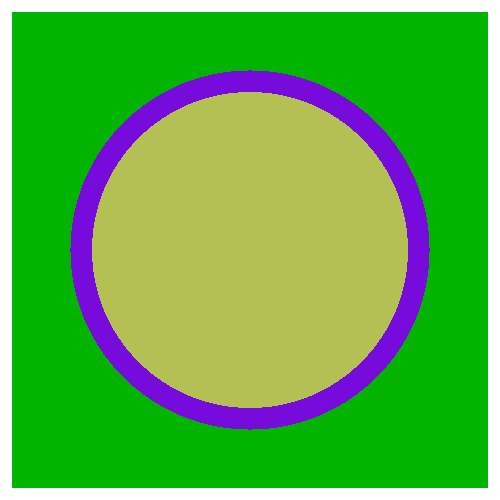

In [16]:
# export needed for plotting
model.materials.export_to_xml()
model.geometry.export_to_xml()

plot = openmc.Plot()
plot.filename = 'pin_cell'
plot.from_geometry(model.geometry)
plot.pixels = (500, 500)
dr = pitch * 0.05
plot.width = (pitch+dr, pitch+dr)
plot.origin = (0., 0., 0)
plot.color_by = 'cell'

model.plots = openmc.Plots([plot])
plot.to_ipython_image(openmc_exec='openmc', cwd='./')

###  Settings

In [17]:
settings = openmc.Settings()

bounds = [-pitch/2, -pitch/2, -rod_height/2, pitch/2, +pitch/2, rod_height/2]
uniform_dist = openmc.stats.Box(bounds[:3], bounds[3:], only_fissionable=True)

source = openmc.IndependentSource(space=uniform_dist)

settings.source = source

settings.batches = 30
settings.inactive = 20
settings.particles = 20000
settings.keff_trigger = {'type':'std_dev','threshold':0.00030}
settings.trigger_active = True
settings.trigger_max_batches = 50000
settings.output = {'tallies':True}

settings.temperature['method'] = 'interpolation'

model.settings = settings

settings_file = settings

### Tallies

In [18]:
tallies = openmc.Tallies()
model.tallies = tallies

### Define and choose energy group

In [19]:
egroup_name = 'SHEM-361'
egroup = openmc.mgxs.GROUP_STRUCTURES[egroup_name]

### Create MGXS tallies for mgxs directory

In [20]:
mgxs_lib_dict = {}

pn_order = [0,1,3,5,7]

for pn in pn_order:
    
    mgxs_lib_ = openmc.mgxs.Library(model.geometry)
    groups = openmc.mgxs.EnergyGroups(egroup)

    mgxs_lib_.energy_groups = groups
    mgxs_lib_.scatter_format = "legendre"
    mgxs_lib_.mgxs_types = ['transport','nu-transport','absorption', 'nu-fission', 'fission' ,\
                                  'chi', 'consistent scatter matrix', 'multiplicity matrix','total',\
                                  'consistent nu-scatter matrix']

    mgxs_lib_.legendre_order = pn
    if pn == 0:
        mgxs_lib_.correction = None
        
    mgxs_lib_.by_nuclide = False
    mgxs_lib_.domain_type = 'cell'
    mgxs_lib_.domains = model.geometry.get_all_material_cells().values()
    mgxs_lib_.build_library()
    mgxs_lib_.check_library_for_openmc_mgxs()
    
    mgxs_lib_.add_to_tallies_file(tallies, merge=False)
    
    mgxs_lib_dict[pn] = copy.deepcopy(mgxs_lib_)

/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 1 is greater than zero
  warn(msg, RuntimeWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 3 is greater than zero
  warn(msg, RuntimeWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 5 is greater than zero
  warn(msg, RuntimeWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 7 is greater than zero
  warn(msg, RuntimeWarning)


### Create power tally

In [21]:
## model.export_to_model_xml('model_iso.xml')

### Run OpenMC model

In [22]:
statepoint_filename = model.run()

/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=1.
  warn(msg, IDWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=2.
  warn(msg, IDWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=3.
  warn(msg, IDWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=4.
  warn(msg, IDWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=21.
  warn(msg, IDWarning)
/Users/jean.ragusa/anaconda3/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=31.
  warn(msg, IDWarning)
/Users/jean.ragusa/anacond

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

       42/1    1.20649    1.18832 +/- 0.00224
 Triggers unsatisfied, max unc./thresh. is 5.0689033748363395 for eigenvalue
 The estimated number of batches is 586
       43/1    1.19154    1.18846 +/- 0.00214
 Triggers unsatisfied, max unc./thresh. is 4.883251973277051 for eigenvalue
 The estimated number of batches is 569
       44/1    1.19059    1.18855 +/- 0.00205
 Triggers unsatisfied, max unc./thresh. is 4.6961964169387365 for eigenvalue
 The estimated number of batches is 550
       45/1    1.17200    1.18789 +/- 0.00208
 Triggers unsatisfied, max unc./thresh. is 4.437113798911748 for eigenvalue
 The estimated number of batches is 513
       46/1    1.19117    1.18802 +/- 0.00200
 Triggers unsatisfied, max unc./thresh. is 4.279355214938213 for eigenvalue
 The estimated number of batches is 497
       47/1    1.19021    1.18810 +/- 0.00193
 Triggers unsatisfied, max unc./thresh. is 4.179002142652565 for eigenvalue
 The estimated number of batches is 492
       48/1    1.18768    

       93/1    1.18185    1.18570 +/- 0.00131
 Triggers unsatisfied, max unc./thresh. is 2.7951113245114874 for eigenvalue
 The estimated number of batches is 591
       94/1    1.16330    1.18539 +/- 0.00132
 Triggers unsatisfied, max unc./thresh. is 2.8073118843946827 for eigenvalue
 The estimated number of batches is 604
       95/1    1.18356    1.18537 +/- 0.00131
 Triggers unsatisfied, max unc./thresh. is 2.774054482361614 for eigenvalue
 The estimated number of batches is 598
       96/1    1.18687    1.18539 +/- 0.00129
 Triggers unsatisfied, max unc./thresh. is 2.761072927173182 for eigenvalue
 The estimated number of batches is 600
       97/1    1.16369    1.18511 +/- 0.00130
 Triggers unsatisfied, max unc./thresh. is 2.8128926116953004 for eigenvalue
 The estimated number of batches is 630
       98/1    1.19096    1.18518 +/- 0.00129
 Triggers unsatisfied, max unc./thresh. is 2.784865229403754 for eigenvalue
 The estimated number of batches is 625
       99/1    1.20209   

      144/1    1.19563    1.18578 +/- 0.00098
 Triggers unsatisfied, max unc./thresh. is 1.929237959979073 for eigenvalue
 The estimated number of batches is 482
      145/1    1.19259    1.18583 +/- 0.00098
 Triggers unsatisfied, max unc./thresh. is 1.914429781025747 for eigenvalue
 The estimated number of batches is 479
      146/1    1.17604    1.18575 +/- 0.00097
 Triggers unsatisfied, max unc./thresh. is 1.910355153493436 for eigenvalue
 The estimated number of batches is 480
      147/1    1.18438    1.18574 +/- 0.00096
 Triggers unsatisfied, max unc./thresh. is 1.900604760939979 for eigenvalue
 The estimated number of batches is 479
      148/1    1.19933    1.18585 +/- 0.00096
 Triggers unsatisfied, max unc./thresh. is 1.891511344907264 for eigenvalue
 The estimated number of batches is 478
      149/1    1.17377    1.18575 +/- 0.00096
 Triggers unsatisfied, max unc./thresh. is 1.8846483133937129 for eigenvalue
 The estimated number of batches is 479
      150/1    1.20365    1

      195/1    1.20106    1.18551 +/- 0.00081
 Triggers unsatisfied, max unc./thresh. is 1.5753083883037962 for eigenvalue
 The estimated number of batches is 455
      196/1    1.18012    1.18548 +/- 0.00081
 Triggers unsatisfied, max unc./thresh. is 1.5667045037414666 for eigenvalue
 The estimated number of batches is 453
      197/1    1.17082    1.18540 +/- 0.00081
 Triggers unsatisfied, max unc./thresh. is 1.5688272721176744 for eigenvalue
 The estimated number of batches is 456
      198/1    1.17286    1.18533 +/- 0.00080
 Triggers unsatisfied, max unc./thresh. is 1.563019185102375 for eigenvalue
 The estimated number of batches is 455
      199/1    1.20126    1.18542 +/- 0.00080
 Triggers unsatisfied, max unc./thresh. is 1.5556062928582248 for eigenvalue
 The estimated number of batches is 454
      200/1    1.19539    1.18547 +/- 0.00080
 Triggers unsatisfied, max unc./thresh. is 1.5472709931883013 for eigenvalue
 The estimated number of batches is 451
      201/1    1.18081 

      246/1    1.19270    1.18541 +/- 0.00073
 Triggers unsatisfied, max unc./thresh. is 1.3528665851549309 for eigenvalue
 The estimated number of batches is 434
      247/1    1.18463    1.18541 +/- 0.00073
 Triggers unsatisfied, max unc./thresh. is 1.3465935875737696 for eigenvalue
 The estimated number of batches is 432
      248/1    1.18636    1.18541 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.3458468803533306 for eigenvalue
 The estimated number of batches is 433
      249/1    1.18592    1.18541 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.343999801589663 for eigenvalue
 The estimated number of batches is 434
      250/1    1.17765    1.18538 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.341493186376159 for eigenvalue
 The estimated number of batches is 434
      251/1    1.18179    1.18536 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.3366924835199265 for eigenvalue
 The estimated number of batches is 433
      252/1    1.17693  

      297/1    1.18142    1.18541 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.229516556141878 for eigenvalue
 The estimated number of batches is 439
      298/1    1.20251    1.18547 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.2276628841264983 for eigenvalue
 The estimated number of batches is 439
      299/1    1.19134    1.18549 +/- 0.00063
 Triggers unsatisfied, max unc./thresh. is 1.224387187429051 for eigenvalue
 The estimated number of batches is 439
      300/1    1.20036    1.18555 +/- 0.00063
 Triggers unsatisfied, max unc./thresh. is 1.2196623839171052 for eigenvalue
 The estimated number of batches is 437
      301/1    1.19266    1.18557 +/- 0.00063
 Triggers unsatisfied, max unc./thresh. is 1.2157910299419383 for eigenvalue
 The estimated number of batches is 436
      302/1    1.18806    1.18558 +/- 0.00063
 Triggers unsatisfied, max unc./thresh. is 1.21195752590946 for eigenvalue
 The estimated number of batches is 435
      303/1    1.18239    

      348/1    1.19365    1.18560 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.156934359549214 for eigenvalue
 The estimated number of batches is 460
      349/1    1.20106    1.18565 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.1557914265415923 for eigenvalue
 The estimated number of batches is 460
      350/1    1.18224    1.18564 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.1523229990887558 for eigenvalue
 The estimated number of batches is 459
      351/1    1.19508    1.18567 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.149456827300498 for eigenvalue
 The estimated number of batches is 458
      352/1    1.18897    1.18568 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.1469097747786496 for eigenvalue
 The estimated number of batches is 457
      353/1    1.20134    1.18573 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.1449815741362215 for eigenvalue
 The estimated number of batches is 457
      354/1    1.18982  

      399/1    1.17120    1.18595 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.0715013589306908 for eigenvalue
 The estimated number of batches is 456
      400/1    1.19875    1.18598 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.0755127555316628 for eigenvalue
 The estimated number of batches is 460
      401/1    1.19151    1.18600 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.0732042386012082 for eigenvalue
 The estimated number of batches is 459
      402/1    1.20354    1.18604 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.0714451733100603 for eigenvalue
 The estimated number of batches is 459
      403/1    1.19059    1.18606 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.0688177022683782 for eigenvalue
 The estimated number of batches is 458
      404/1    1.18731    1.18606 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.0663359693780052 for eigenvalue
 The estimated number of batches is 457
      405/1    1.18999

      450/1    1.18246    1.18663 +/- 0.00052
 Triggers unsatisfied, max unc./thresh. is 1.0005297860333575 for eigenvalue
 The estimated number of batches is 451
      451/1    1.18702    1.18663 +/- 0.00052
 Triggers satisfied for batch 451
 Creating state point statepoint.00451.h5...

 =======================>     TIMING STATISTICS     <=======================

 Total time for initialization     = 3.6005e+00 seconds
   Reading cross sections          = 3.5718e+00 seconds
 Total time in simulation          = 7.9900e+02 seconds
   Time in transport only          = 7.8171e+02 seconds
   Time in inactive batches        = 2.7615e+00 seconds
   Time in active batches          = 7.9624e+02 seconds
   Time synchronizing fission bank = 2.5777e-01 seconds
     Sampling source sites         = 2.2996e-01 seconds
     SEND/RECV source sites        = 2.7582e-02 seconds
   Time accumulating tallies       = 1.5856e+01 seconds
   Time writing statepoints        = 1.0636e+00 seconds
 Total time for f

In [23]:
ce_spfile = f'./statepoint_{egroup_name}_ce.h5'
ce_sumfile = f'./summary_{egroup_name}_ce.h5'
print(ce_spfile)

./statepoint_SHEM-361_ce.h5


In [24]:
os.rename(statepoint_filename, ce_spfile)
os.rename('summary.h5', ce_sumfile)

In [25]:
# trick to make several runs work with jupyter
try:
    sp 
    print('sp found')
    sp.close()
except NameError:
    print('sp NOT found')

sp NOT found


In [26]:
sp = openmc.StatePoint(ce_spfile, autolink=False)
su = openmc.Summary(ce_sumfile)
sp.link_with_summary(su)

In [27]:
for pn in pn_order:
    print("pn=",pn)
    mgxs_lib_order = copy.deepcopy(mgxs_lib_dict[pn])
    
    mgxs_lib_order.load_from_statepoint(sp)
    
# this may not be necessary:
#     mgxs_file_order = mgxs_lib_order.create_mg_library(xs_type='macro', \
#                                                     xsdata_names=['fuel', 'clad', 'moderator'])
        
    mgxs_file_order, materials_file, geometry_file = mgxs_lib_order.create_mg_mode(\
                                                        xsdata_names=['fuel', 'clad', 'moderator'])

    mgxs_file_order.xsdatas[0].temperatures=[565.]
    mgxs_file_order.xsdatas[1].temperatures=[565.]
    mgxs_file_order.xsdatas[2].temperatures=[565.]

    mgxs_file_order.export_to_hdf5(f'mgxs_order{pn}_{egroup_name}.h5')
    materials_file.cross_sections = f'mgxs_order{pn}_{egroup_name}.h5'
    
    model_order = openmc.Model()
    model_order.materials = materials_file
    model_order.geometry = geometry_file
    settings_file.energy_mode = 'multi-group'
    model_order.settings = settings_file   
    
    statepoint_filename_order = model_order.run()

pn= 0
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 ###############

 Loading moderator data...


 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.19271
        2/1    1.19051


        3/1    1.20139
        4/1    1.19487
        5/1    1.19319
        6/1    1.18306
        7/1    1.17537
        8/1    1.17520
        9/1    1.15587
       10/1    1.18163
       11/1    1.17064
       12/1    1.18368
       13/1    1.19966
       14/1    1.17667
       15/1    1.18009
       16/1    1.19039
       17/1    1.16939
       18/1    1.17639
       19/1    1.17528
       20/1    1.18372
       21/1    1.19751
       22/1    1.17867    1.18809 +/- 0.00942
       23/1    1.17048    1.18222 +/- 0.00800
       24/1    1.17500    1.18041 +/- 0.00594
       25/1    1.17801    1.17993 +/- 0.00463
       26/1    1.17831    1.17966 +/- 0.00379
       27/1    1.19246    1.18149 +/- 0.00369
       28/1    1.18552    1.18199 +/- 0.00323
       29/1    1.17000    1.18066 +/- 0.00315
       30/1    1.18922    1.18152 +/- 0.00294
 Triggers unsatisfied, max unc./thresh. is 6.400894586655633 for eigenvalue
 The estimated number of batches is 430
 Creating state point statepoint.

       78/1    1.18553    1.18439 +/- 0.00138
 Triggers unsatisfied, max unc./thresh. is 2.239647715714541 for eigenvalue
 The estimated number of batches is 311
       79/1    1.17908    1.18430 +/- 0.00136
 Triggers unsatisfied, max unc./thresh. is 2.2006241438853453 for eigenvalue
 The estimated number of batches is 306
       80/1    1.18141    1.18425 +/- 0.00134
 Triggers unsatisfied, max unc./thresh. is 2.1888690178087726 for eigenvalue
 The estimated number of batches is 308
       81/1    1.18437    1.18426 +/- 0.00132
 Triggers unsatisfied, max unc./thresh. is 2.1691203453584746 for eigenvalue
 The estimated number of batches is 308
       82/1    1.18561    1.18428 +/- 0.00129
 Triggers unsatisfied, max unc./thresh. is 2.1293590102905378 for eigenvalue
 The estimated number of batches is 302
       83/1    1.18662    1.18432 +/- 0.00127
 Triggers unsatisfied, max unc./thresh. is 2.1021930069035646 for eigenvalue
 The estimated number of batches is 299
       84/1    1.18763 

      131/1    1.17822    1.18484 +/- 0.00101
 Triggers unsatisfied, max unc./thresh. is 1.6090104429832854 for eigenvalue
 The estimated number of batches is 308
      132/1    1.18813    1.18487 +/- 0.00100
 Triggers unsatisfied, max unc./thresh. is 1.6074898873656787 for eigenvalue
 The estimated number of batches is 310
      133/1    1.19245    1.18494 +/- 0.00099
 Triggers unsatisfied, max unc./thresh. is 1.6264188813493816 for eigenvalue
 The estimated number of batches is 319
      134/1    1.17158    1.18482 +/- 0.00099
 Triggers unsatisfied, max unc./thresh. is 1.6153762270837329 for eigenvalue
 The estimated number of batches is 318
      135/1    1.18985    1.18486 +/- 0.00098
 Triggers unsatisfied, max unc./thresh. is 1.6067937319107968 for eigenvalue
 The estimated number of batches is 317
      136/1    1.20018    1.18500 +/- 0.00098
 Triggers unsatisfied, max unc./thresh. is 1.5941770169767449 for eigenvalue
 The estimated number of batches is 315
      137/1    1.18276

      185/1    1.19816    1.18554 +/- 0.00082
 Triggers unsatisfied, max unc./thresh. is 1.3520172816812401 for eigenvalue
 The estimated number of batches is 322
      186/1    1.19942    1.18562 +/- 0.00082
 Triggers unsatisfied, max unc./thresh. is 1.3461621599997935 for eigenvalue
 The estimated number of batches is 321
      187/1    1.18645    1.18563 +/- 0.00082
 Triggers unsatisfied, max unc./thresh. is 1.3388527096784075 for eigenvalue
 The estimated number of batches is 320
      188/1    1.15834    1.18546 +/- 0.00083
 Triggers unsatisfied, max unc./thresh. is 1.340330585806265 for eigenvalue
 The estimated number of batches is 322
      189/1    1.18525    1.18546 +/- 0.00083
 Triggers unsatisfied, max unc./thresh. is 1.3403638943314522 for eigenvalue
 The estimated number of batches is 324
      190/1    1.17441    1.18540 +/- 0.00082
 Triggers unsatisfied, max unc./thresh. is 1.3355218228281402 for eigenvalue
 The estimated number of batches is 324
      191/1    1.17193 

      236/1    1.17953    1.18500 +/- 0.00074
 Triggers unsatisfied, max unc./thresh. is 1.2520846365876779 for eigenvalue
 The estimated number of batches is 359
      237/1    1.16211    1.18489 +/- 0.00074
 Triggers unsatisfied, max unc./thresh. is 1.2524770807405565 for eigenvalue
 The estimated number of batches is 361
      238/1    1.17708    1.18486 +/- 0.00074
 Triggers unsatisfied, max unc./thresh. is 1.256165145773822 for eigenvalue
 The estimated number of batches is 364
      239/1    1.17199    1.18480 +/- 0.00074
 Triggers unsatisfied, max unc./thresh. is 1.261686568142427 for eigenvalue
 The estimated number of batches is 369
      240/1    1.19176    1.18483 +/- 0.00073
 Triggers unsatisfied, max unc./thresh. is 1.258969783239467 for eigenvalue
 The estimated number of batches is 369
      241/1    1.17839    1.18480 +/- 0.00073
 Triggers unsatisfied, max unc./thresh. is 1.2550077018503194 for eigenvalue
 The estimated number of batches is 369
      242/1    1.20091   

      287/1    1.16956    1.18488 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.1337503471186934 for eigenvalue
 The estimated number of batches is 364
      288/1    1.17164    1.18483 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.137237699385959 for eigenvalue
 The estimated number of batches is 367
      289/1    1.18803    1.18485 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.1352006715921592 for eigenvalue
 The estimated number of batches is 367
      290/1    1.16905    1.18479 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.1312936125145148 for eigenvalue
 The estimated number of batches is 366
      291/1    1.16717    1.18472 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.127587286957435 for eigenvalue
 The estimated number of batches is 365
      292/1    1.19348    1.18476 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.1233525320823512 for eigenvalue
 The estimated number of batches is 364
      293/1    1.17463  

      339/1    1.19181    1.18457 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.0291944847884311 for eigenvalue
 The estimated number of batches is 358
      340/1    1.18354    1.18457 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.027417963026013 for eigenvalue
 The estimated number of batches is 358
      341/1    1.18238    1.18456 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.0269102964481218 for eigenvalue
 The estimated number of batches is 359
      342/1    1.18873    1.18458 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.023644738628997 for eigenvalue
 The estimated number of batches is 358
      343/1    1.18778    1.18459 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.0205269875826688 for eigenvalue
 The estimated number of batches is 357
      344/1    1.18166    1.18458 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.018323715591098 for eigenvalue
 The estimated number of batches is 356
      345/1    1.17612   

 Loading moderator data...


 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.17056


        2/1    1.18636
        3/1    1.18394
        4/1    1.20620
        5/1    1.19420
        6/1    1.19969
        7/1    1.19059
        8/1    1.16927
        9/1    1.17052
       10/1    1.20481
       11/1    1.16618
       12/1    1.17352
       13/1    1.17144
       14/1    1.17042
       15/1    1.17395
       16/1    1.18468
       17/1    1.17978
       18/1    1.18055
       19/1    1.17716
       20/1    1.16969
       21/1    1.18016
       22/1    1.16333    1.17175 +/- 0.00841
       23/1    1.19625    1.17991 +/- 0.00950
       24/1    1.17792    1.17941 +/- 0.00674
       25/1    1.16626    1.17678 +/- 0.00585
       26/1    1.19826    1.18036 +/- 0.00597
       27/1    1.20570    1.18398 +/- 0.00621
       28/1    1.16939    1.18216 +/- 0.00568
       29/1    1.19136    1.18318 +/- 0.00511
       30/1    1.20111    1.18497 +/- 0.00491
 Triggers unsatisfied, max unc./thresh. is 6.996156179952117 for eigenvalue
 The estimated number of batches is 510
 Creating 

       79/1    1.18126    1.18675 +/- 0.00159
 Triggers unsatisfied, max unc./thresh. is 2.1880458205225306 for eigenvalue
 The estimated number of batches is 303
       80/1    1.19903    1.18695 +/- 0.00157
 Triggers unsatisfied, max unc./thresh. is 2.1701471706573607 for eigenvalue
 The estimated number of batches is 303
       81/1    1.18947    1.18699 +/- 0.00155
 Triggers unsatisfied, max unc./thresh. is 2.1398245070309954 for eigenvalue
 The estimated number of batches is 300
       82/1    1.17265    1.18676 +/- 0.00154
 Triggers unsatisfied, max unc./thresh. is 2.106323119261112 for eigenvalue
 The estimated number of batches is 296
       83/1    1.18163    1.18668 +/- 0.00152
 Triggers unsatisfied, max unc./thresh. is 2.1570649708009655 for eigenvalue
 The estimated number of batches is 314
       84/1    1.18862    1.18671 +/- 0.00149
 Triggers unsatisfied, max unc./thresh. is 2.1504926224764964 for eigenvalue
 The estimated number of batches is 316
       85/1    1.18902 

      131/1    1.15733    1.18739 +/- 0.00112
 Triggers unsatisfied, max unc./thresh. is 1.6649033579003747 for eigenvalue
 The estimated number of batches is 328
      132/1    1.18183    1.18734 +/- 0.00111
 Triggers unsatisfied, max unc./thresh. is 1.6538064763337763 for eigenvalue
 The estimated number of batches is 327
      133/1    1.18319    1.18730 +/- 0.00110
 Triggers unsatisfied, max unc./thresh. is 1.6620527089038153 for eigenvalue
 The estimated number of batches is 333
      134/1    1.18658    1.18730 +/- 0.00109
 Triggers unsatisfied, max unc./thresh. is 1.6485349351163365 for eigenvalue
 The estimated number of batches is 330
      135/1    1.19865    1.18739 +/- 0.00109
 Triggers unsatisfied, max unc./thresh. is 1.640188422448275 for eigenvalue
 The estimated number of batches is 330
      136/1    1.17334    1.18727 +/- 0.00109
 Triggers unsatisfied, max unc./thresh. is 1.6313065046136637 for eigenvalue
 The estimated number of batches is 329
      137/1    1.18634 

      183/1    1.16966    1.18751 +/- 0.00091
 Triggers unsatisfied, max unc./thresh. is 1.3986429743786637 for eigenvalue
 The estimated number of batches is 339
      184/1    1.18266    1.18748 +/- 0.00090
 Triggers unsatisfied, max unc./thresh. is 1.3936701070474837 for eigenvalue
 The estimated number of batches is 339
      185/1    1.17019    1.18738 +/- 0.00090
 Triggers unsatisfied, max unc./thresh. is 1.3919753554777805 for eigenvalue
 The estimated number of batches is 340
      186/1    1.17315    1.18729 +/- 0.00090
 Triggers unsatisfied, max unc./thresh. is 1.3975126974970435 for eigenvalue
 The estimated number of batches is 345
      187/1    1.17256    1.18720 +/- 0.00090
 Triggers unsatisfied, max unc./thresh. is 1.3880721245120178 for eigenvalue
 The estimated number of batches is 342
      188/1    1.18585    1.18720 +/- 0.00089
 Triggers unsatisfied, max unc./thresh. is 1.3809153216144763 for eigenvalue
 The estimated number of batches is 341
      189/1    1.19194

      235/1    1.20100    1.18689 +/- 0.00076
 Triggers unsatisfied, max unc./thresh. is 1.235069104025363 for eigenvalue
 The estimated number of batches is 348
      236/1    1.18516    1.18688 +/- 0.00075
 Triggers unsatisfied, max unc./thresh. is 1.2314033434318818 for eigenvalue
 The estimated number of batches is 348
      237/1    1.18756    1.18689 +/- 0.00075
 Triggers unsatisfied, max unc./thresh. is 1.230659817254169 for eigenvalue
 The estimated number of batches is 349
      238/1    1.18880    1.18689 +/- 0.00075
 Triggers unsatisfied, max unc./thresh. is 1.2253586396497076 for eigenvalue
 The estimated number of batches is 348
      239/1    1.19937    1.18695 +/- 0.00075
 Triggers unsatisfied, max unc./thresh. is 1.2201733440524127 for eigenvalue
 The estimated number of batches is 347
      240/1    1.20039    1.18701 +/- 0.00074
 Triggers unsatisfied, max unc./thresh. is 1.2254961800242925 for eigenvalue
 The estimated number of batches is 351
      241/1    1.18164  

      286/1    1.19414    1.18687 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.1086009706929711 for eigenvalue
 The estimated number of batches is 347
      287/1    1.19798    1.18691 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.1059921860910353 for eigenvalue
 The estimated number of batches is 347
      288/1    1.18511    1.18690 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.102823664393109 for eigenvalue
 The estimated number of batches is 346
      289/1    1.20057    1.18696 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.0999461861148243 for eigenvalue
 The estimated number of batches is 346
      290/1    1.18448    1.18695 +/- 0.00066
 Triggers unsatisfied, max unc./thresh. is 1.0972016216778746 for eigenvalue
 The estimated number of batches is 346
      291/1    1.19334    1.18697 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.0965538799855759 for eigenvalue
 The estimated number of batches is 346
      292/1    1.19060 

      340/1    1.17385    1.18687 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.0167294152554964 for eigenvalue
 The estimated number of batches is 351
      341/1    1.18842    1.18688 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.0188173590565368 for eigenvalue
 The estimated number of batches is 354
      342/1    1.18275    1.18686 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.0159714569036762 for eigenvalue
 The estimated number of batches is 353
      343/1    1.18836    1.18687 +/- 0.00060
 Triggers unsatisfied, max unc./thresh. is 1.0133320292616323 for eigenvalue
 The estimated number of batches is 352
      344/1    1.19067    1.18688 +/- 0.00060
 Triggers unsatisfied, max unc./thresh. is 1.0107246828651741 for eigenvalue
 The estimated number of batches is 351
      345/1    1.17609    1.18685 +/- 0.00060
 Triggers unsatisfied, max unc./thresh. is 1.00959909225378 for eigenvalue
 The estimated number of batches is 352
      346/1    1.19135  

 Loading moderator data...


 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.18740
        2/1    1.18629


        3/1    1.16859
        4/1    1.18151
        5/1    1.17190
        6/1    1.18335
        7/1    1.16120
        8/1    1.17690
        9/1    1.18774
       10/1    1.18915
       11/1    1.18591
       12/1    1.19479
       13/1    1.19573
       14/1    1.20015
       15/1    1.17866
       16/1    1.19380
       17/1    1.19272
       18/1    1.17121
       19/1    1.17995
       20/1    1.19586
       21/1    1.19083
       22/1    1.18919    1.19001 +/- 0.00082
       23/1    1.18311    1.18771 +/- 0.00235
       24/1    1.17905    1.18554 +/- 0.00273
       25/1    1.17684    1.18380 +/- 0.00274
       26/1    1.18225    1.18354 +/- 0.00225
       27/1    1.16970    1.18157 +/- 0.00274
       28/1    1.17249    1.18043 +/- 0.00263
       29/1    1.17272    1.17957 +/- 0.00248
       30/1    1.19189    1.18081 +/- 0.00253
 Triggers unsatisfied, max unc./thresh. is 5.6762785057898295 for eigenvalue
 The estimated number of batches is 343
 Creating state point statepoint

       78/1    1.19499    1.18450 +/- 0.00128
 Triggers unsatisfied, max unc./thresh. is 2.5525535886737134 for eigenvalue
 The estimated number of batches is 398
       79/1    1.14913    1.18390 +/- 0.00139
 Triggers unsatisfied, max unc./thresh. is 2.7649753699456907 for eigenvalue
 The estimated number of batches is 472
       80/1    1.19313    1.18405 +/- 0.00138
 Triggers unsatisfied, max unc./thresh. is 2.7501261218062782 for eigenvalue
 The estimated number of batches is 474
       81/1    1.19374    1.18421 +/- 0.00136
 Triggers unsatisfied, max unc./thresh. is 2.9692356402518936 for eigenvalue
 The estimated number of batches is 558
       82/1    1.18876    1.18428 +/- 0.00134
 Triggers unsatisfied, max unc./thresh. is 2.9444925173923835 for eigenvalue
 The estimated number of batches is 558
       83/1    1.16644    1.18400 +/- 0.00135
 Triggers unsatisfied, max unc./thresh. is 2.9218274539794775 for eigenvalue
 The estimated number of batches is 558
       84/1    1.19712

      130/1    1.20067    1.18638 +/- 0.00104
 Triggers unsatisfied, max unc./thresh. is 1.952481699533771 for eigenvalue
 The estimated number of batches is 440
      131/1    1.20636    1.18656 +/- 0.00104
 Triggers unsatisfied, max unc./thresh. is 1.9395401887867416 for eigenvalue
 The estimated number of batches is 438
      132/1    1.19627    1.18665 +/- 0.00104
 Triggers unsatisfied, max unc./thresh. is 1.9230681463379582 for eigenvalue
 The estimated number of batches is 435
      133/1    1.19096    1.18669 +/- 0.00103
 Triggers unsatisfied, max unc./thresh. is 1.9116516436808977 for eigenvalue
 The estimated number of batches is 433
      134/1    1.17026    1.18655 +/- 0.00103
 Triggers unsatisfied, max unc./thresh. is 1.894801023686811 for eigenvalue
 The estimated number of batches is 430
      135/1    1.19160    1.18659 +/- 0.00102
 Triggers unsatisfied, max unc./thresh. is 1.881228736223526 for eigenvalue
 The estimated number of batches is 427
      136/1    1.19164   

      181/1    1.18030    1.18671 +/- 0.00086
 Triggers unsatisfied, max unc./thresh. is 1.6591145183860163 for eigenvalue
 The estimated number of batches is 464
      182/1    1.19821    1.18678 +/- 0.00086
 Triggers unsatisfied, max unc./thresh. is 1.6507522811963393 for eigenvalue
 The estimated number of batches is 462
      183/1    1.18492    1.18677 +/- 0.00085
 Triggers unsatisfied, max unc./thresh. is 1.6469097894517113 for eigenvalue
 The estimated number of batches is 463
      184/1    1.18773    1.18677 +/- 0.00084
 Triggers unsatisfied, max unc./thresh. is 1.6403881708568206 for eigenvalue
 The estimated number of batches is 462
      185/1    1.18298    1.18675 +/- 0.00084
 Triggers unsatisfied, max unc./thresh. is 1.6428354624457229 for eigenvalue
 The estimated number of batches is 466
      186/1    1.18818    1.18676 +/- 0.00083
 Triggers unsatisfied, max unc./thresh. is 1.6346511280739189 for eigenvalue
 The estimated number of batches is 464
      187/1    1.20045

      233/1    1.17897    1.18659 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.4274905671934068 for eigenvalue
 The estimated number of batches is 455
      234/1    1.17816    1.18655 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.42120334929287 for eigenvalue
 The estimated number of batches is 453
      235/1    1.19081    1.18657 +/- 0.00071
 Triggers unsatisfied, max unc./thresh. is 1.414560943053728 for eigenvalue
 The estimated number of batches is 451
      236/1    1.18699    1.18658 +/- 0.00071
 Triggers unsatisfied, max unc./thresh. is 1.4075321052899807 for eigenvalue
 The estimated number of batches is 448
      237/1    1.17180    1.18651 +/- 0.00071
 Triggers unsatisfied, max unc./thresh. is 1.405318844115104 for eigenvalue
 The estimated number of batches is 449
      238/1    1.16351    1.18640 +/- 0.00071
 Triggers unsatisfied, max unc./thresh. is 1.4059435924546129 for eigenvalue
 The estimated number of batches is 451
      239/1    1.16896    

      285/1    1.17328    1.18602 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.3033767443639546 for eigenvalue
 The estimated number of batches is 471
      286/1    1.18162    1.18601 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.3011946528287301 for eigenvalue
 The estimated number of batches is 471
      287/1    1.18933    1.18602 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.2967459142382682 for eigenvalue
 The estimated number of batches is 469
      288/1    1.17688    1.18598 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.2928166187108285 for eigenvalue
 The estimated number of batches is 468
      289/1    1.16245    1.18590 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.300185202809637 for eigenvalue
 The estimated number of batches is 475
      290/1    1.18546    1.18589 +/- 0.00064
 Triggers unsatisfied, max unc./thresh. is 1.3009381151464303 for eigenvalue
 The estimated number of batches is 477
      291/1    1.18385 

      336/1    1.18015    1.18557 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.2256857450268277 for eigenvalue
 The estimated number of batches is 495
      337/1    1.18317    1.18556 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.2224584965287257 for eigenvalue
 The estimated number of batches is 494
      338/1    1.19423    1.18559 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.2189926947784389 for eigenvalue
 The estimated number of batches is 493
      339/1    1.20052    1.18563 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.2154254775464097 for eigenvalue
 The estimated number of batches is 492
      340/1    1.18361    1.18563 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.2124312978199518 for eigenvalue
 The estimated number of batches is 491
      341/1    1.19620    1.18566 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.209713351857815 for eigenvalue
 The estimated number of batches is 490
      342/1    1.18610 

      387/1    1.16886    1.18560 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.116590020608383 for eigenvalue
 The estimated number of batches is 478
      388/1    1.16126    1.18554 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.1144876647525188 for eigenvalue
 The estimated number of batches is 478
      389/1    1.19431    1.18556 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.11166134493341 for eigenvalue
 The estimated number of batches is 477
      390/1    1.17159    1.18552 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.1116336997066776 for eigenvalue
 The estimated number of batches is 478
      391/1    1.19968    1.18556 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.1107524314927504 for eigenvalue
 The estimated number of batches is 478
      392/1    1.19992    1.18560 +/- 0.00055
 Triggers unsatisfied, max unc./thresh. is 1.1108489698365072 for eigenvalue
 The estimated number of batches is 480
      393/1    1.17665   

      438/1    1.19846    1.18584 +/- 0.00051
 Triggers unsatisfied, max unc./thresh. is 1.0319406899602401 for eigenvalue
 The estimated number of batches is 466
      439/1    1.19125    1.18585 +/- 0.00051
 Triggers unsatisfied, max unc./thresh. is 1.0297096743403655 for eigenvalue
 The estimated number of batches is 465
      440/1    1.17112    1.18582 +/- 0.00051
 Triggers unsatisfied, max unc./thresh. is 1.0322987274323467 for eigenvalue
 The estimated number of batches is 468
      441/1    1.18255    1.18581 +/- 0.00051
 Triggers unsatisfied, max unc./thresh. is 1.0341026596913678 for eigenvalue
 The estimated number of batches is 471
      442/1    1.19001    1.18582 +/- 0.00051
 Triggers unsatisfied, max unc./thresh. is 1.0316216492916068 for eigenvalue
 The estimated number of batches is 470
      443/1    1.18457    1.18582 +/- 0.00051
 Triggers unsatisfied, max unc./thresh. is 1.0301528316719428 for eigenvalue
 The estimated number of batches is 469
      444/1    1.14612

 Loading moderator data...


 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.20596


        2/1    1.17453
        3/1    1.19272
        4/1    1.18416
        5/1    1.17359
        6/1    1.20153
        7/1    1.18450
        8/1    1.18506
        9/1    1.16158
       10/1    1.19181
       11/1    1.18177
       12/1    1.18755
       13/1    1.19660
       14/1    1.18316
       15/1    1.19454
       16/1    1.18485
       17/1    1.18520
       18/1    1.18424
       19/1    1.20093
       20/1    1.19325
       21/1    1.18918
       22/1    1.18404    1.18661 +/- 0.00257
       23/1    1.19116    1.18813 +/- 0.00212
       24/1    1.19541    1.18995 +/- 0.00236
       25/1    1.18023    1.18800 +/- 0.00267
       26/1    1.20198    1.19033 +/- 0.00319
       27/1    1.17093    1.18756 +/- 0.00387
       28/1    1.18346    1.18705 +/- 0.00339
       29/1    1.18870    1.18723 +/- 0.00299
       30/1    1.19193    1.18770 +/- 0.00272
 Triggers unsatisfied, max unc./thresh. is 2.3840773217362625 for eigenvalue
 The estimated number of batches is 77
 Creating 

       79/1    1.18305    1.18595 +/- 0.00128
 Triggers unsatisfied, max unc./thresh. is 2.540408698627348 for eigenvalue
 The estimated number of batches is 401
       80/1    1.18181    1.18588 +/- 0.00126
 Triggers unsatisfied, max unc./thresh. is 2.516173015091101 for eigenvalue
 The estimated number of batches is 400
       81/1    1.19783    1.18608 +/- 0.00125
 Triggers unsatisfied, max unc./thresh. is 2.47654655282322 for eigenvalue
 The estimated number of batches is 395
       82/1    1.18877    1.18612 +/- 0.00123
 Triggers unsatisfied, max unc./thresh. is 2.4785565730327477 for eigenvalue
 The estimated number of batches is 401
       83/1    1.19612    1.18628 +/- 0.00123
 Triggers unsatisfied, max unc./thresh. is 2.4426221207802663 for eigenvalue
 The estimated number of batches is 396
       84/1    1.17238    1.18606 +/- 0.00123
 Triggers unsatisfied, max unc./thresh. is 2.4339614131858642 for eigenvalue
 The estimated number of batches is 400
       85/1    1.19341    

      131/1    1.19599    1.18670 +/- 0.00086
 Triggers unsatisfied, max unc./thresh. is 1.7762160650128789 for eigenvalue
 The estimated number of batches is 371
      132/1    1.18368    1.18667 +/- 0.00085
 Triggers unsatisfied, max unc./thresh. is 1.7573067031532457 for eigenvalue
 The estimated number of batches is 366
      133/1    1.18797    1.18668 +/- 0.00084
 Triggers unsatisfied, max unc./thresh. is 1.7428117581022529 for eigenvalue
 The estimated number of batches is 364
      134/1    1.17922    1.18662 +/- 0.00084
 Triggers unsatisfied, max unc./thresh. is 1.7277919688017942 for eigenvalue
 The estimated number of batches is 361
      135/1    1.19096    1.18665 +/- 0.00083
 Triggers unsatisfied, max unc./thresh. is 1.71515569652277 for eigenvalue
 The estimated number of batches is 359
      136/1    1.18598    1.18665 +/- 0.00082
 Triggers unsatisfied, max unc./thresh. is 1.699912515504157 for eigenvalue
 The estimated number of batches is 356
      137/1    1.18573   

      183/1    1.18699    1.18645 +/- 0.00075
 Triggers unsatisfied, max unc./thresh. is 1.481805994310255 for eigenvalue
 The estimated number of batches is 378
      184/1    1.18407    1.18643 +/- 0.00074
 Triggers unsatisfied, max unc./thresh. is 1.4736138869485982 for eigenvalue
 The estimated number of batches is 377
      185/1    1.18248    1.18641 +/- 0.00074
 Triggers unsatisfied, max unc./thresh. is 1.4736276555001915 for eigenvalue
 The estimated number of batches is 379
      186/1    1.18443    1.18640 +/- 0.00073
 Triggers unsatisfied, max unc./thresh. is 1.4648983826283715 for eigenvalue
 The estimated number of batches is 377
      187/1    1.18870    1.18641 +/- 0.00073
 Triggers unsatisfied, max unc./thresh. is 1.4623075570451387 for eigenvalue
 The estimated number of batches is 378
      188/1    1.18882    1.18643 +/- 0.00072
 Triggers unsatisfied, max unc./thresh. is 1.457502143485387 for eigenvalue
 The estimated number of batches is 377
      189/1    1.20159  

      234/1    1.19606    1.18690 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.302822817402143 for eigenvalue
 The estimated number of batches is 384
      235/1    1.19419    1.18694 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.2984014259350096 for eigenvalue
 The estimated number of batches is 383
      236/1    1.18133    1.18691 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.2936046368848264 for eigenvalue
 The estimated number of batches is 382
      237/1    1.16841    1.18683 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.288064551658309 for eigenvalue
 The estimated number of batches is 381
      238/1    1.18111    1.18680 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.2825480453111135 for eigenvalue
 The estimated number of batches is 379
      239/1    1.17363    1.18674 +/- 0.00065
 Triggers unsatisfied, max unc./thresh. is 1.2750805256884 for eigenvalue
 The estimated number of batches is 377
      240/1    1.18971    1

      285/1    1.17339    1.18647 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.12277729997475 for eigenvalue
 The estimated number of batches is 355
      286/1    1.19314    1.18649 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.1187043474867406 for eigenvalue
 The estimated number of batches is 353
      287/1    1.17287    1.18644 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.1172115249153514 for eigenvalue
 The estimated number of batches is 354
      288/1    1.20250    1.18650 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.114147637194631 for eigenvalue
 The estimated number of batches is 353
      289/1    1.19995    1.18655 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.110603700507852 for eigenvalue
 The estimated number of batches is 352
      290/1    1.20036    1.18660 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.112966776514502 for eigenvalue
 The estimated number of batches is 355
      291/1    1.18078    1

      337/1    1.19442    1.18639 +/- 0.00054
 Triggers unsatisfied, max unc./thresh. is 1.040296855465864 for eigenvalue
 The estimated number of batches is 364
      338/1    1.17840    1.18636 +/- 0.00054
 Triggers unsatisfied, max unc./thresh. is 1.0385396171820886 for eigenvalue
 The estimated number of batches is 363
      339/1    1.17205    1.18632 +/- 0.00054
 Triggers unsatisfied, max unc./thresh. is 1.0354345599288624 for eigenvalue
 The estimated number of batches is 363
      340/1    1.19312    1.18634 +/- 0.00054
 Triggers unsatisfied, max unc./thresh. is 1.0325637642629522 for eigenvalue
 The estimated number of batches is 362
      341/1    1.19115    1.18635 +/- 0.00054
 Triggers unsatisfied, max unc./thresh. is 1.031282687009762 for eigenvalue
 The estimated number of batches is 362
      342/1    1.18571    1.18635 +/- 0.00054
 Triggers unsatisfied, max unc./thresh. is 1.0297468678604393 for eigenvalue
 The estimated number of batches is 362
      343/1    1.18020  

 Loading clad data...
 Loading moderator data...


 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.17219


        2/1    1.17881
        3/1    1.20113
        4/1    1.17695
        5/1    1.19176
        6/1    1.18391
        7/1    1.19334
        8/1    1.18981
        9/1    1.18401
       10/1    1.18386
       11/1    1.18484
       12/1    1.19203
       13/1    1.19493
       14/1    1.18466
       15/1    1.20439
       16/1    1.17440
       17/1    1.19038
       18/1    1.18815
       19/1    1.17966
       20/1    1.17728
       21/1    1.18948
       22/1    1.19528    1.19238 +/- 0.00290
       23/1    1.19667    1.19381 +/- 0.00220
       24/1    1.19221    1.19341 +/- 0.00161
       25/1    1.19101    1.19293 +/- 0.00133
       26/1    1.17803    1.19044 +/- 0.00271
       27/1    1.18695    1.18994 +/- 0.00235
       28/1    1.19412    1.19047 +/- 0.00210
       29/1    1.16687    1.18784 +/- 0.00321
       30/1    1.17340    1.18640 +/- 0.00321
 Triggers unsatisfied, max unc./thresh. is 4.927420063112897 for eigenvalue
 The estimated number of batches is 263
 Creating 

       77/1    1.18875    1.18648 +/- 0.00133
 Triggers unsatisfied, max unc./thresh. is 2.4984386072506215 for eigenvalue
 The estimated number of batches is 376
       78/1    1.20231    1.18676 +/- 0.00133
 Triggers unsatisfied, max unc./thresh. is 2.4700750054220086 for eigenvalue
 The estimated number of batches is 374
       79/1    1.18080    1.18666 +/- 0.00131
 Triggers unsatisfied, max unc./thresh. is 2.4751303282645782 for eigenvalue
 The estimated number of batches is 382
       80/1    1.16813    1.18635 +/- 0.00133
 Triggers unsatisfied, max unc./thresh. is 2.4869598050593447 for eigenvalue
 The estimated number of batches is 392
       81/1    1.19520    1.18649 +/- 0.00132
 Triggers unsatisfied, max unc./thresh. is 2.4591461475860577 for eigenvalue
 The estimated number of batches is 389
       82/1    1.18683    1.18650 +/- 0.00129
 Triggers unsatisfied, max unc./thresh. is 2.424754846692824 for eigenvalue
 The estimated number of batches is 385
       83/1    1.19141 

      129/1    1.16904    1.18620 +/- 0.00102
 Triggers unsatisfied, max unc./thresh. is 1.7978951649270432 for eigenvalue
 The estimated number of batches is 373
      130/1    1.18307    1.18617 +/- 0.00101
 Triggers unsatisfied, max unc./thresh. is 1.7836744563728142 for eigenvalue
 The estimated number of batches is 370
      131/1    1.19569    1.18626 +/- 0.00101
 Triggers unsatisfied, max unc./thresh. is 1.769620200848688 for eigenvalue
 The estimated number of batches is 368
      132/1    1.17726    1.18618 +/- 0.00100
 Triggers unsatisfied, max unc./thresh. is 1.7534816328009784 for eigenvalue
 The estimated number of batches is 365
      133/1    1.18576    1.18617 +/- 0.00099
 Triggers unsatisfied, max unc./thresh. is 1.7411200027888774 for eigenvalue
 The estimated number of batches is 363
      134/1    1.17798    1.18610 +/- 0.00099
 Triggers unsatisfied, max unc./thresh. is 1.7311304925213482 for eigenvalue
 The estimated number of batches is 362
      135/1    1.18731 

      180/1    1.19955    1.18652 +/- 0.00082
 Triggers unsatisfied, max unc./thresh. is 1.4155311700536672 for eigenvalue
 The estimated number of batches is 341
      181/1    1.20372    1.18663 +/- 0.00083
 Triggers unsatisfied, max unc./thresh. is 1.4088342353333534 for eigenvalue
 The estimated number of batches is 340
      182/1    1.18442    1.18661 +/- 0.00082
 Triggers unsatisfied, max unc./thresh. is 1.4000757351118795 for eigenvalue
 The estimated number of batches is 338
      183/1    1.18229    1.18659 +/- 0.00082
 Triggers unsatisfied, max unc./thresh. is 1.3983740731165581 for eigenvalue
 The estimated number of batches is 339
      184/1    1.19329    1.18663 +/- 0.00081
 Triggers unsatisfied, max unc./thresh. is 1.405798914675673 for eigenvalue
 The estimated number of batches is 345
      185/1    1.18549    1.18662 +/- 0.00081
 Triggers unsatisfied, max unc./thresh. is 1.3969009048249292 for eigenvalue
 The estimated number of batches is 342
      186/1    1.20310 

      232/1    1.17101    1.18653 +/- 0.00069
 Triggers unsatisfied, max unc./thresh. is 1.228261349837723 for eigenvalue
 The estimated number of batches is 340
      233/1    1.16696    1.18643 +/- 0.00070
 Triggers unsatisfied, max unc./thresh. is 1.2371908889847676 for eigenvalue
 The estimated number of batches is 347
      234/1    1.18125    1.18641 +/- 0.00069
 Triggers unsatisfied, max unc./thresh. is 1.2317184228967468 for eigenvalue
 The estimated number of batches is 345
      235/1    1.18013    1.18638 +/- 0.00069
 Triggers unsatisfied, max unc./thresh. is 1.2243126515134477 for eigenvalue
 The estimated number of batches is 343
      236/1    1.18876    1.18639 +/- 0.00069
 Triggers unsatisfied, max unc./thresh. is 1.2199113742620131 for eigenvalue
 The estimated number of batches is 342
      237/1    1.18105    1.18637 +/- 0.00069
 Triggers unsatisfied, max unc./thresh. is 1.2145112481395792 for eigenvalue
 The estimated number of batches is 341
      238/1    1.18447 

      283/1    1.18643    1.18653 +/- 0.00062
 Triggers unsatisfied, max unc./thresh. is 1.1028975497914428 for eigenvalue
 The estimated number of batches is 340
      284/1    1.19564    1.18656 +/- 0.00062
 Triggers unsatisfied, max unc./thresh. is 1.099520378996726 for eigenvalue
 The estimated number of batches is 340
      285/1    1.18461    1.18655 +/- 0.00062
 Triggers unsatisfied, max unc./thresh. is 1.0950544209225153 for eigenvalue
 The estimated number of batches is 338
      286/1    1.19797    1.18660 +/- 0.00062
 Triggers unsatisfied, max unc./thresh. is 1.091608447649131 for eigenvalue
 The estimated number of batches is 337
      287/1    1.18872    1.18660 +/- 0.00062
 Triggers unsatisfied, max unc./thresh. is 1.0871040598924817 for eigenvalue
 The estimated number of batches is 336
      288/1    1.18206    1.18659 +/- 0.00061
 Triggers unsatisfied, max unc./thresh. is 1.0848778622680937 for eigenvalue
 The estimated number of batches is 336
      289/1    1.17756  

      334/1    1.16736    1.18611 +/- 0.00059
 Triggers unsatisfied, max unc./thresh. is 1.0402677754815044 for eigenvalue
 The estimated number of batches is 360
      335/1    1.19345    1.18613 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.0370609824120918 for eigenvalue
 The estimated number of batches is 359
      336/1    1.18868    1.18614 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.0336009837473015 for eigenvalue
 The estimated number of batches is 358
      337/1    1.19731    1.18617 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.0336848779935137 for eigenvalue
 The estimated number of batches is 359
      338/1    1.18635    1.18617 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.0309934141065427 for eigenvalue
 The estimated number of batches is 359
      339/1    1.18780    1.18618 +/- 0.00058
 Triggers unsatisfied, max unc./thresh. is 1.0281367004816107 for eigenvalue
 The estimated number of batches is 358
      340/1    1.17072

## Clean up by deleting unwanted files

In [31]:
import os
import re

def delete_runtime_files(directory='.'):
    """
    Deletes all files with a .xml extension, files named statepoint.NNNNN.h5 where N is a digit,
    and the file named summary.h5 in the specified directory.

    Parameters:
    directory (str): The directory to search for files. Defaults to the current directory.
    """
    
    # Regular expression pattern to match files named statepoint.NNNNN.h5
    pattern = re.compile(r'statepoint\.\d{5}\.h5')

    # Iterate through files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        
        # Check if the file has a .xml extension, matches the pattern, or is named summary.h5
        if filename.endswith('.xml') or pattern.match(filename) or filename == 'summary.h5' \
           or filename == 'tallies.out':
            # Delete the file
            try:
                os.remove(file_path)
                print(f"Deleted: {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")

# Example usage:
# delete_runtime_files('/path/to/directory')  # specify the directory path if needed

In [32]:
delete_runtime_files('./')

Deleted: ./plots.xml
Deleted: ./statepoint.00477.h5
Deleted: ./model.xml
Deleted: ./statepoint.00030.h5
Deleted: ./statepoint.00372.h5
Deleted: ./summary.h5
Deleted: ./statepoint.00354.h5
Deleted: ./statepoint.00350.h5
Deleted: ./materials.xml
Deleted: ./geometry.xml
